### Import das dependências

In [16]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

### Importar os datasets

In [17]:
data_path = '../data/' if os.path.exists('../data/') else 'https://raw.githubusercontent.com/kreativermario/Projeto-DECD/master/data/'

merged_path = data_path + 'treated/merged-dataset.csv'

merged_df = pd.read_csv(merged_path)


### Verificar qualidade dos dados
- Verificar valores null
- Verificar duplicados

In [18]:
# Verificar valores vazios
nulls = merged_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = merged_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())


Número de nulls:  nível_de_tensão                 0
ano                             0
mês                             0
energia_ativa_(kwh)             0
cpes_doméstico                  0
cpes_iluminação_pública         0
cpes_não_doméstico              0
cpes_outros                     0
cpes_mobilidade_eletrica_não    0
cpes_mobilidade_eletrica_sim    0
dtype: int64
Número de linhas duplicadas: 0


In [19]:
# Estatísticas sumarizadas
merged_df.describe()

,ano,mês,energia_ativa_(kwh),cpes_doméstico,cpes_iluminação_pública,cpes_não_doméstico,cpes_outros,cpes_mobilidade_eletrica_não,cpes_mobilidade_eletrica_sim
count,9790.000000,9790.000000,9.790000e+03,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000,9790.000000
mean,2022.777528,7.167926,6.698904e+06,9437.674055,107.457508,2176.664760,64.922983,13562.938815,4.675996
std,0.532665,3.624244,1.301081e+07,22853.667206,174.274733,5290.937589,159.619755,22955.528565,12.331074
min,2022.000000,1.000000,1.899000e+03,0.000000,0.000000,5.000000,0.000000,572.000000,0.000000
25%,2022.000000,4.000000,8.817195e+05,0.000000,0.000000,52.000000,0.000000,3063.000000,1.000000
50%,2023.000000,8.000000,2.290926e+06,1289.500000,15.000000,428.000000,5.000000,5692.500000,1.000000
75%,2023.000000,10.000000,6.572700e+06,8943.000000,141.000000,2000.000000,55.000000,14888.000000,3.000000
max,2024.000000,12.000000,1.633807e+08,312074.000000,1185.000000,79984.000000,2186.000000,264079.000000,191.000000


In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9790 entries, 0 to 9789
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nível_de_tensão               9790 non-null   object 
 1   ano                           9790 non-null   int64  
 2   mês                           9790 non-null   int64  
 3   energia_ativa_(kwh)           9790 non-null   float64
 4   cpes_doméstico                9790 non-null   float64
 5   cpes_iluminação_pública       9790 non-null   float64
 6   cpes_não_doméstico            9790 non-null   float64
 7   cpes_outros                   9790 non-null   float64
 8   cpes_mobilidade_eletrica_não  9790 non-null   float64
 9   cpes_mobilidade_eletrica_sim  9790 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 765.0+ KB


### Verificar a correlação entre as variáveis númericas

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Float Variables)')
plt.show()


In [ ]:
# Pairplot
sns.pairplot(merged_df)
plt.show()

### Procurar por Outliers

In [21]:
def find_outliers(f):
    q1 = f.quantile(0.25)
    q3 = f.quantile(0.75)
    iqr = q3 - q1
    return f[(f < (q1 - 1.5 * iqr)) | (f > (q3 + 1.5 * iqr))]

#### Gráfico da variável Ano

In [ ]:
# Coluna para analisar
coluna_ano = 'ano'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_ano], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_ano}')
ax_boxplot.set_xlabel(coluna_ano)

# Histograma
ax_hist.hist(merged_df[coluna_ano], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_ano}')
ax_hist.set_xlabel(coluna_ano)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Encontrar outliers
outliers = find_outliers(merged_df[coluna_ano])
print(f"Outliers na coluna '{coluna_ano}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'energia_ativa_(kwh)'
total_valores = len(merged_df[coluna_ano])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_ano}' é de {percent_outliers:.2f}%.")

#### Gráfico da variável Mes

In [ ]:
# Coluna para analisar
coluna_mes = 'mês'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_mes], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_mes}')
ax_boxplot.set_xlabel(coluna_mes)

# Histograma
ax_hist.hist(merged_df[coluna_mes], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_mes}')
ax_hist.set_xlabel(coluna_mes)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Encontrar outliers
outliers = find_outliers(merged_df[coluna_mes])
print(f"Outliers na coluna '{coluna_mes}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'mês'
total_valores = len(merged_df[coluna_mes])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_mes}' é de {percent_outliers:.2f}%.")

#### Gráfico da variável Energia Ativa (kWh)

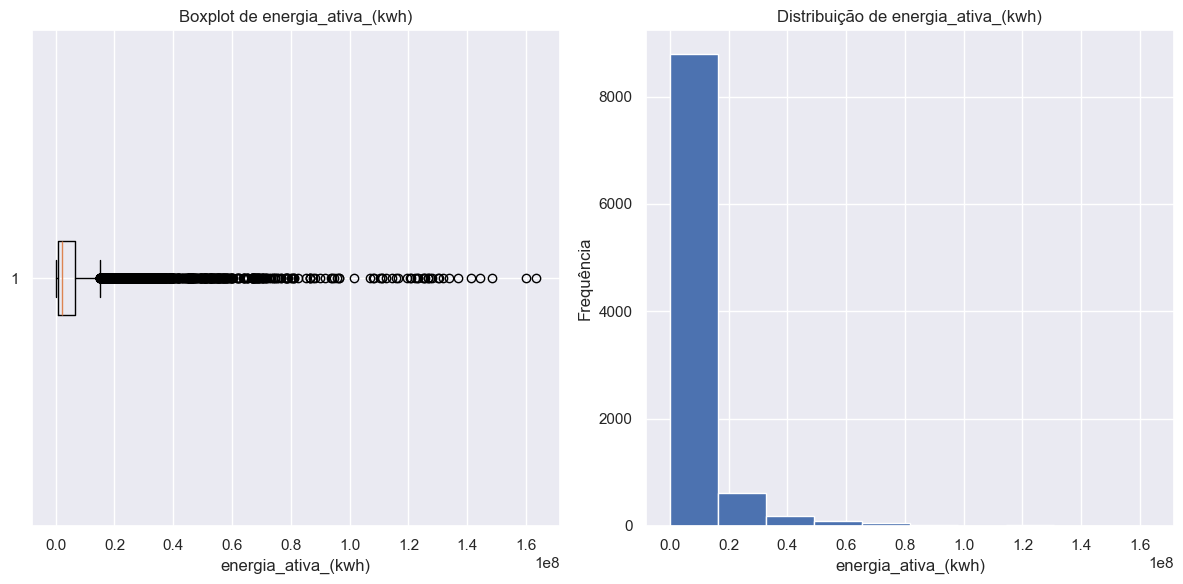

Outliers na coluna 'energia_ativa_(kwh)':
144     2.509320e+07
145     2.158544e+07
146     1.974517e+07
147     1.689313e+07
148     1.730949e+07
            ...     
9675    1.586383e+07
9677    1.525991e+07
9678    1.788758e+07
9679    1.775922e+07
9680    1.511409e+07
Name: energia_ativa_(kwh), Length: 1081, dtype: float64

% outliers 'energia_ativa_(kwh)' é de 11.04%.


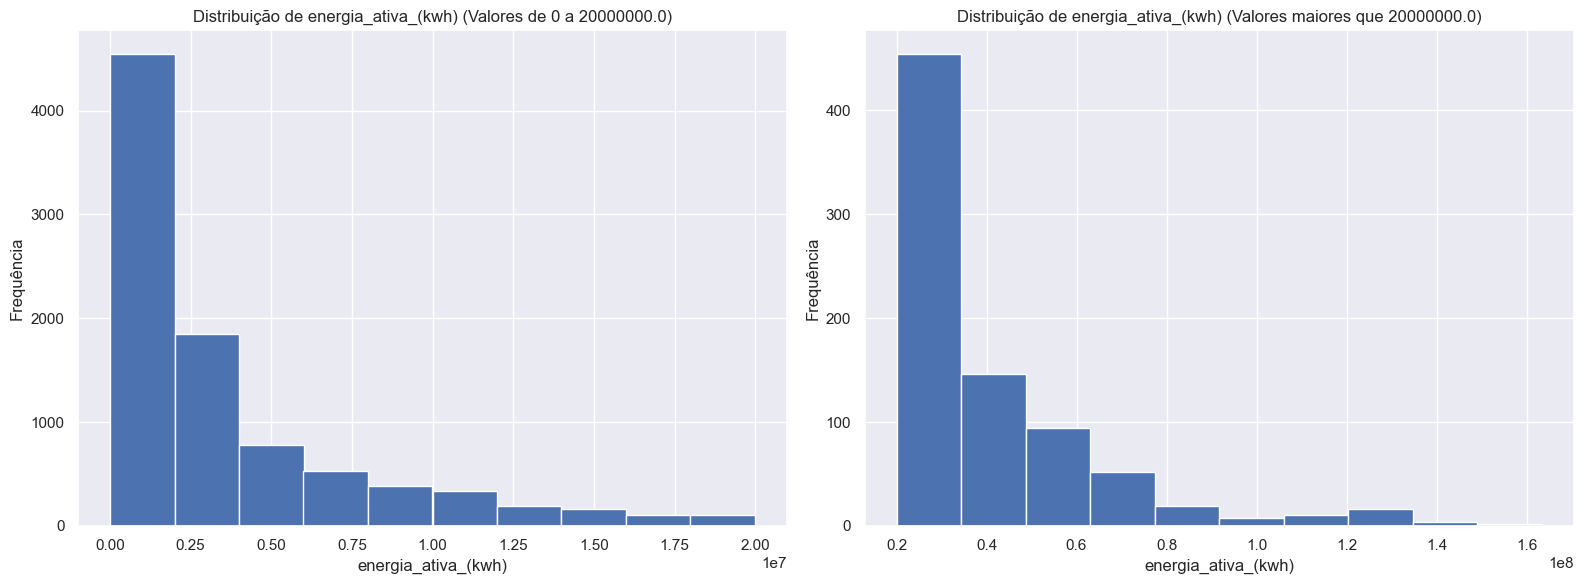

In [26]:
# Coluna para analisar
coluna_energia_ativa = 'energia_ativa_(kwh)'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_energia_ativa], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_energia_ativa}')
ax_boxplot.set_xlabel(coluna_energia_ativa)

# Histograma
ax_hist.hist(merged_df[coluna_energia_ativa], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_energia_ativa}')
ax_hist.set_xlabel(coluna_energia_ativa)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Encontrar outliers
outliers = find_outliers(merged_df[coluna_energia_ativa])
print(f"Outliers na coluna '{coluna_energia_ativa}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'energia_ativa_(kwh)'
total_valores = len(merged_df[coluna_energia_ativa])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_energia_ativa}' é de {percent_outliers:.2f}%.")

# Filtrar os dados para valores entre 0 e 0.2 * 1e8 (20.000.000 kWh)
lower_limit_1 = 0
high_limit_1 = 0.2 * 1e8
filtered_data_1 = merged_df[(merged_df[coluna_energia_ativa] >= lower_limit_1) & (merged_df[coluna_energia_ativa] <= high_limit_1 )]

# Filtrar os dados para valores maiores que 0.2 * 1e8 (20.000.000 kWh)
filtered_data_2 = merged_df[(merged_df[coluna_energia_ativa] > high_limit_1 )]

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para valores entre 0 e 0.2 * 1e8
axes[0].hist(filtered_data_1[coluna_energia_ativa], bins=10)
axes[0].set_title(f'Distribuição de {coluna_energia_ativa} (Valores de {lower_limit_1} a {high_limit_1})')
axes[0].set_xlabel(coluna_energia_ativa)
axes[0].set_ylabel('Frequência')

# Histograma para valores maiores que 0.2 * 1e8
axes[1].hist(filtered_data_2[coluna_energia_ativa], bins=10)
axes[1].set_title(f'Distribuição de {coluna_energia_ativa} (Valores maiores que {high_limit_1})')
axes[1].set_xlabel(coluna_energia_ativa)
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

#### Gráfico da variável CPEs Doméstico

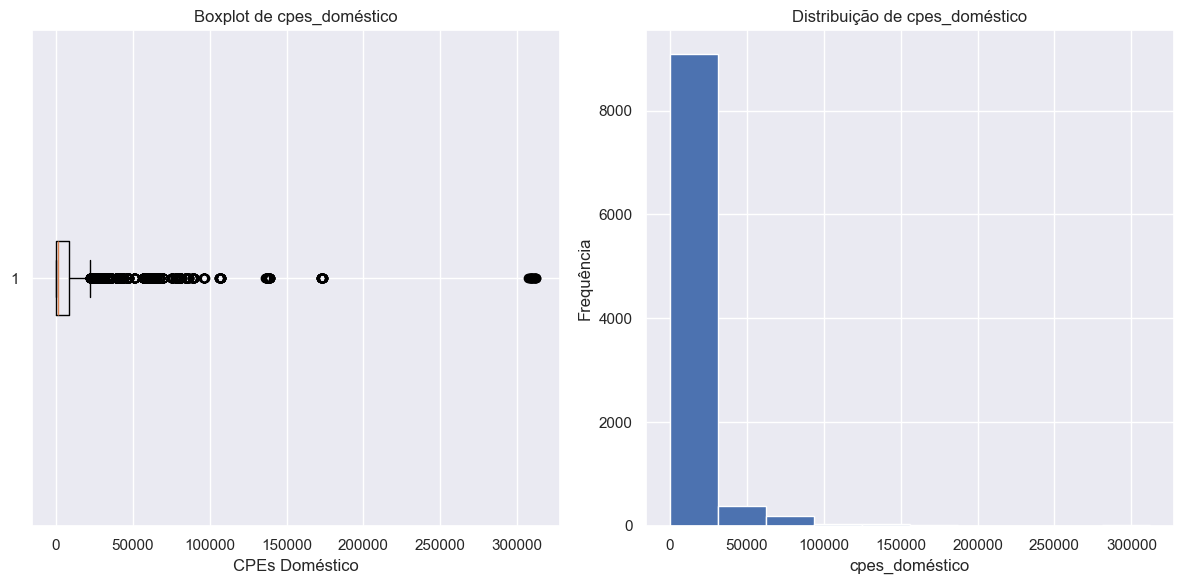

Outliers na coluna 'cpes_doméstico':
144     42621.0
145     42624.0
146     42602.0
147     42408.0
148     42448.0
         ...   
9695    26425.0
9696    26432.0
9697    26447.0
9698    26435.0
9699    26444.0
Name: cpes_doméstico, Length: 1167, dtype: float64

% outliers 'cpes_doméstico' é de 11.92%.


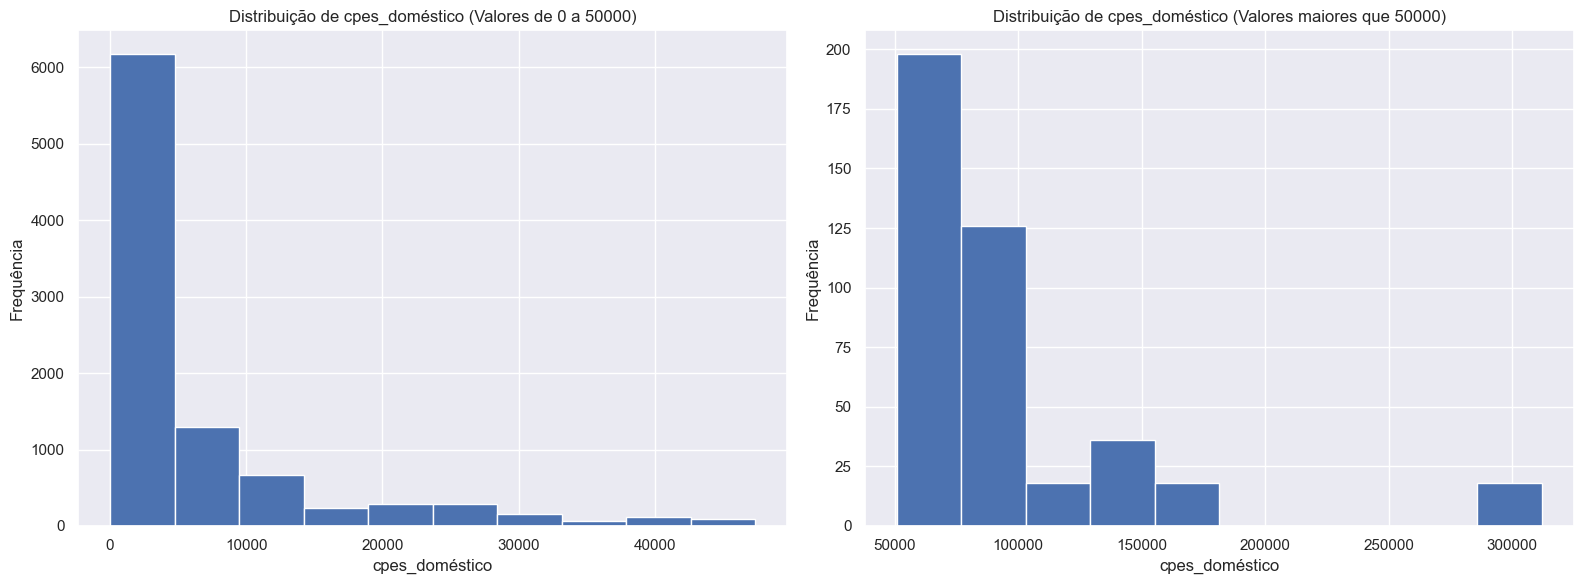

In [25]:
# Coluna para o histograma
coluna_cpes_domestico = 'cpes_doméstico'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_cpes_domestico], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_cpes_domestico}')
ax_boxplot.set_xlabel('CPEs Doméstico')


# Histograma
ax_hist.hist(merged_df[coluna_cpes_domestico], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_cpes_domestico}')
ax_hist.set_xlabel(coluna_cpes_domestico)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Encontrar outliers
outliers = find_outliers(merged_df[coluna_cpes_domestico])
print(f"Outliers na coluna '{coluna_cpes_domestico}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'energia_ativa_(kwh)'
total_valores = len(merged_df[coluna_cpes_domestico])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_cpes_domestico}' é de {percent_outliers:.2f}%.")


# Filtrar os dados para valores entre 0 e 50000
lower_limit_1 = 0
high_limit_1 = 50000
filtered_data_1 = merged_df[(merged_df[coluna_cpes_domestico] >= lower_limit_1) & (merged_df[coluna_cpes_domestico] <= high_limit_1 )]

# Filtrar os dados para valores maiores que 50000
filtered_data_2 = merged_df[(merged_df[coluna_cpes_domestico] > high_limit_1 )]

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para valores entre 0 e 50000
axes[0].hist(filtered_data_1[coluna_cpes_domestico], bins=10)
axes[0].set_title(f'Distribuição de {coluna_cpes_domestico} (Valores de {lower_limit_1} a {high_limit_1})')
axes[0].set_xlabel(coluna_cpes_domestico)
axes[0].set_ylabel('Frequência')

# Histograma para valores maiores que 50000
axes[1].hist(filtered_data_2[coluna_cpes_domestico], bins=10)
axes[1].set_title(f'Distribuição de {coluna_cpes_domestico} (Valores maiores que {high_limit_1})')
axes[1].set_xlabel(coluna_cpes_domestico)
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

#### Gráfico da variável CPEs Iluminação Pública

In [ ]:
# Coluna para o histograma
coluna_cpes_il_pub = 'cpes iluminacao publica'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
sns.boxplot(x='cpes iluminacao publica', data=merged_df, ax=ax_boxplot)
ax_boxplot.set_title(f'Boxplot de {coluna_cpes_il_pub}')
ax_boxplot.set_xlabel('CPEs Iluminacao Publica')


# Histograma
sns.histplot(data=merged_df, x=coluna_cpes_il_pub, ax=ax_hist, bins=10)
ax_hist.set_title(f'Distribuição de {coluna_cpes_il_pub}')
ax_hist.set_xlabel('CPEs Iluminacao Publica')
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

outliers = find_outliers(merged_df[coluna_cpes_il_pub])
print(f"Outliers na coluna '{coluna_cpes_il_pub}':\n{outliers}\n")

#### Gráfico da variável CPEs Não Doméstico 

In [ ]:
# Coluna para o histograma
coluna_cpes_nao_domestico = 'cpes_não_doméstico'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_cpes_nao_domestico], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_cpes_nao_domestico}')
ax_boxplot.set_xlabel(coluna_cpes_nao_domestico)

# Histograma
ax_hist.hist(merged_df[coluna_cpes_nao_domestico], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_cpes_nao_domestico}')
ax_hist.set_xlabel(coluna_cpes_nao_domestico)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Encontrar outliers
outliers = find_outliers(merged_df[coluna_cpes_nao_domestico])
print(f"Outliers na coluna '{coluna_cpes_nao_domestico}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'energia_ativa_(kwh)'
total_valores = len(merged_df[coluna_cpes_nao_domestico])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_cpes_nao_domestico}' é de {percent_outliers:.2f}%.")

#### Gráfico da variável CPEs Outros 

In [ ]:
# Coluna para o histograma
coluna_cpes_outros = 'cpes_outros'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
sns.boxplot(x='cpes_outros', data=merged_df, ax=ax_boxplot)
ax_boxplot.set_title(f'Boxplot de {coluna_cpes_outros}')
ax_boxplot.set_xlabel('CPEs Outros')


# Histograma
sns.histplot(data=merged_df, x=coluna_cpes_outros, ax=ax_hist, bins=10)
ax_hist.set_title(f'Distribuição de {coluna_cpes_outros}')
ax_hist.set_xlabel('CPEs Outros')
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

outliers = find_outliers(merged_df[coluna_cpes_outros])
print(f"Outliers na coluna '{coluna_cpes_outros}':\n{outliers}\n")

#### Gráfico da variável CPEs Mobilidade Eletrica Não 

In [ ]:
# Coluna para analisar
coluna_mob_elect_n = 'mobilidade eletrica nao'

# Criar subplots
fig, (ax_boxplot, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
ax_boxplot.boxplot(merged_df[coluna_mob_elect_n], vert=False)
ax_boxplot.set_title(f'Boxplot de {coluna_mob_elect_n}')
ax_boxplot.set_xlabel(coluna_mob_elect_n)

# Histograma
ax_hist.hist(merged_df[coluna_mob_elect_n], bins=10)
ax_hist.set_title(f'Distribuição de {coluna_mob_elect_n}')
ax_hist.set_xlabel(coluna_mob_elect_n)
ax_hist.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Encontrar outliers
outliers = find_outliers(merged_df[coluna_mob_elect_n])
print(f"Outliers na coluna '{coluna_mob_elect_n}':\n{outliers}\n")

# Calcular o número total de valores na coluna 'mês'
total_valores = len(merged_df[coluna_mob_elect_n])

# Calcular o número de outliers
num_outliers = len(outliers)

# Calcular a percentagem de outliers
percent_outliers = (num_outliers / total_valores) * 100

print(f"% outliers '{coluna_mob_elect_n}' é de {percent_outliers:.2f}%.")